# Step 1: - Download the Dataset
Download the Dataset from the following link:
https://www.kaggle.com/mirichoi0218/insurance/download

# Step 2: - Read the Dataset
Read the dataset into a Pandas Dataframe.
Does the dataset include any missing values? If so, drop them.
Hint: Pandas can do that with one line of code!

In [1]:
import pandas as pd 
df = pd.read_csv("insurance.csv")
df.dropna(inplace=True)

# Step 3: Perform Preprocessing
Perform any needed preprocessing on the chosen features including:
Scaling.
Encoding.
Dealing with Nan values.
Normalization.

In [2]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Description of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Step 4: Prepare Visualization
You are required to deliver a number of visualization for your dataset, including:
Pair Plots for the features.
Correlation Matrix heat map.
Box plots for the features.
Hint: Feel free to add any other visualizations you would like!

In [5]:
#drop any unneeded columns
#df.drop('????', axis=1, inplace=True)

In [6]:
#encode the columns as required
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#label encoder
df['region'] = label_encoder.fit_transform(df['region'])

#one hot encoder
df = pd.get_dummies(df, columns=['sex', 'smoker'])

In [7]:
df.head(5)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,3,16884.92400,1,0,0,1
1,18,33.770,1,2,1725.55230,0,1,1,0
2,28,33.000,3,2,4449.46200,0,1,1,0
3,33,22.705,0,1,21984.47061,0,1,1,0
4,32,28.880,0,1,3866.85520,0,1,1,0


<Axes: >

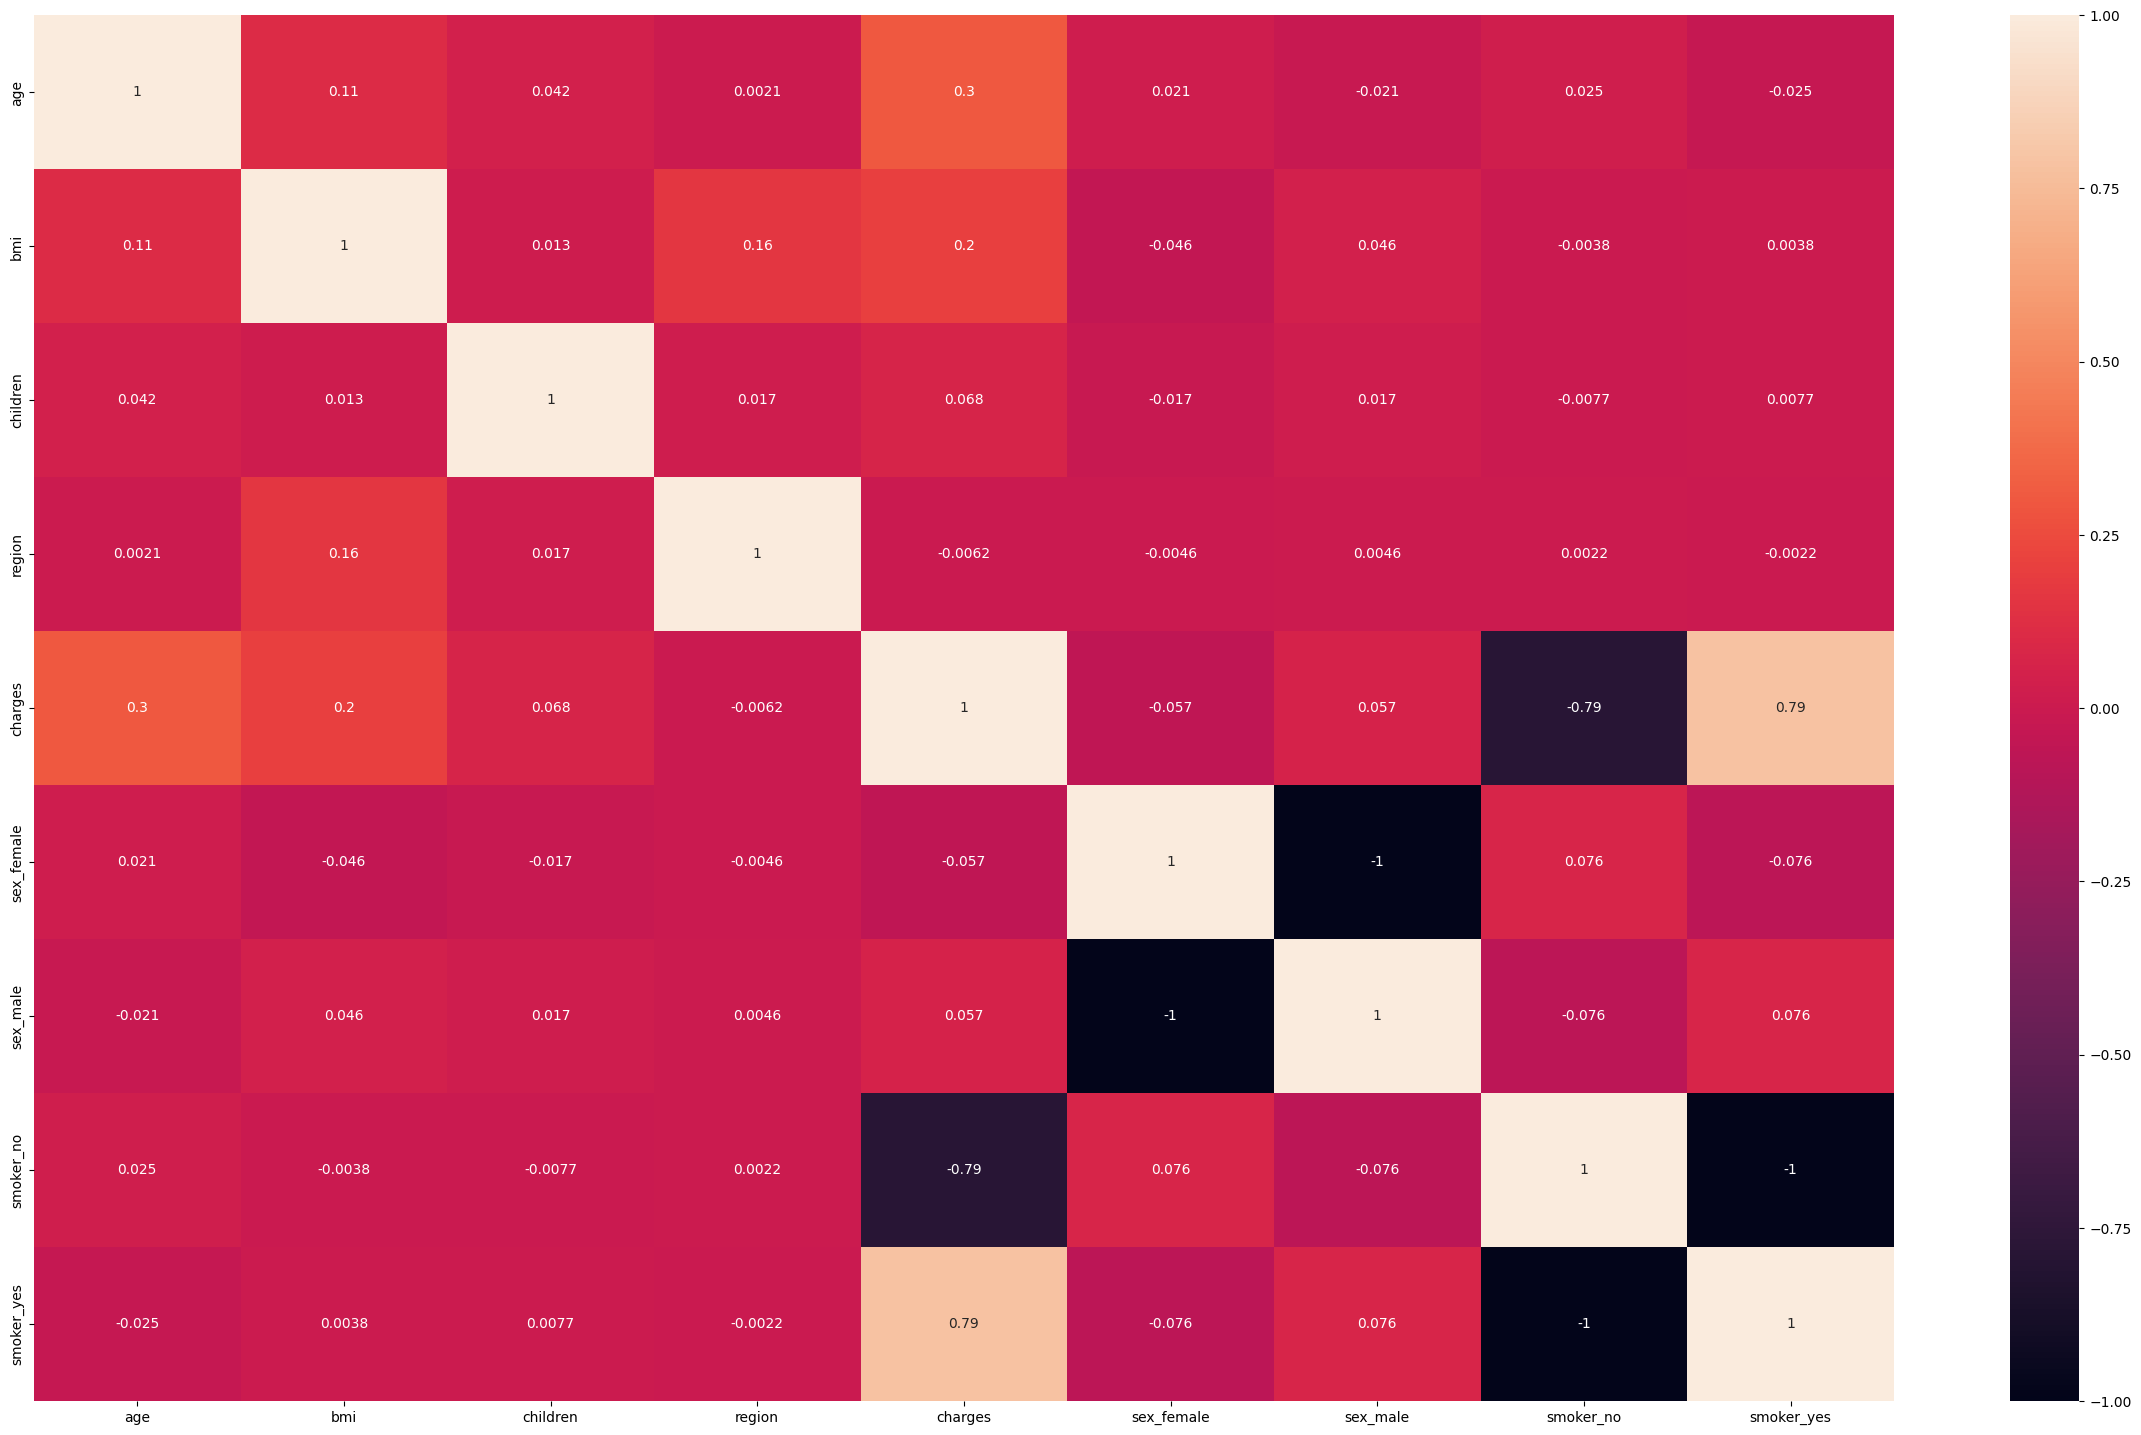

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), annot=True)

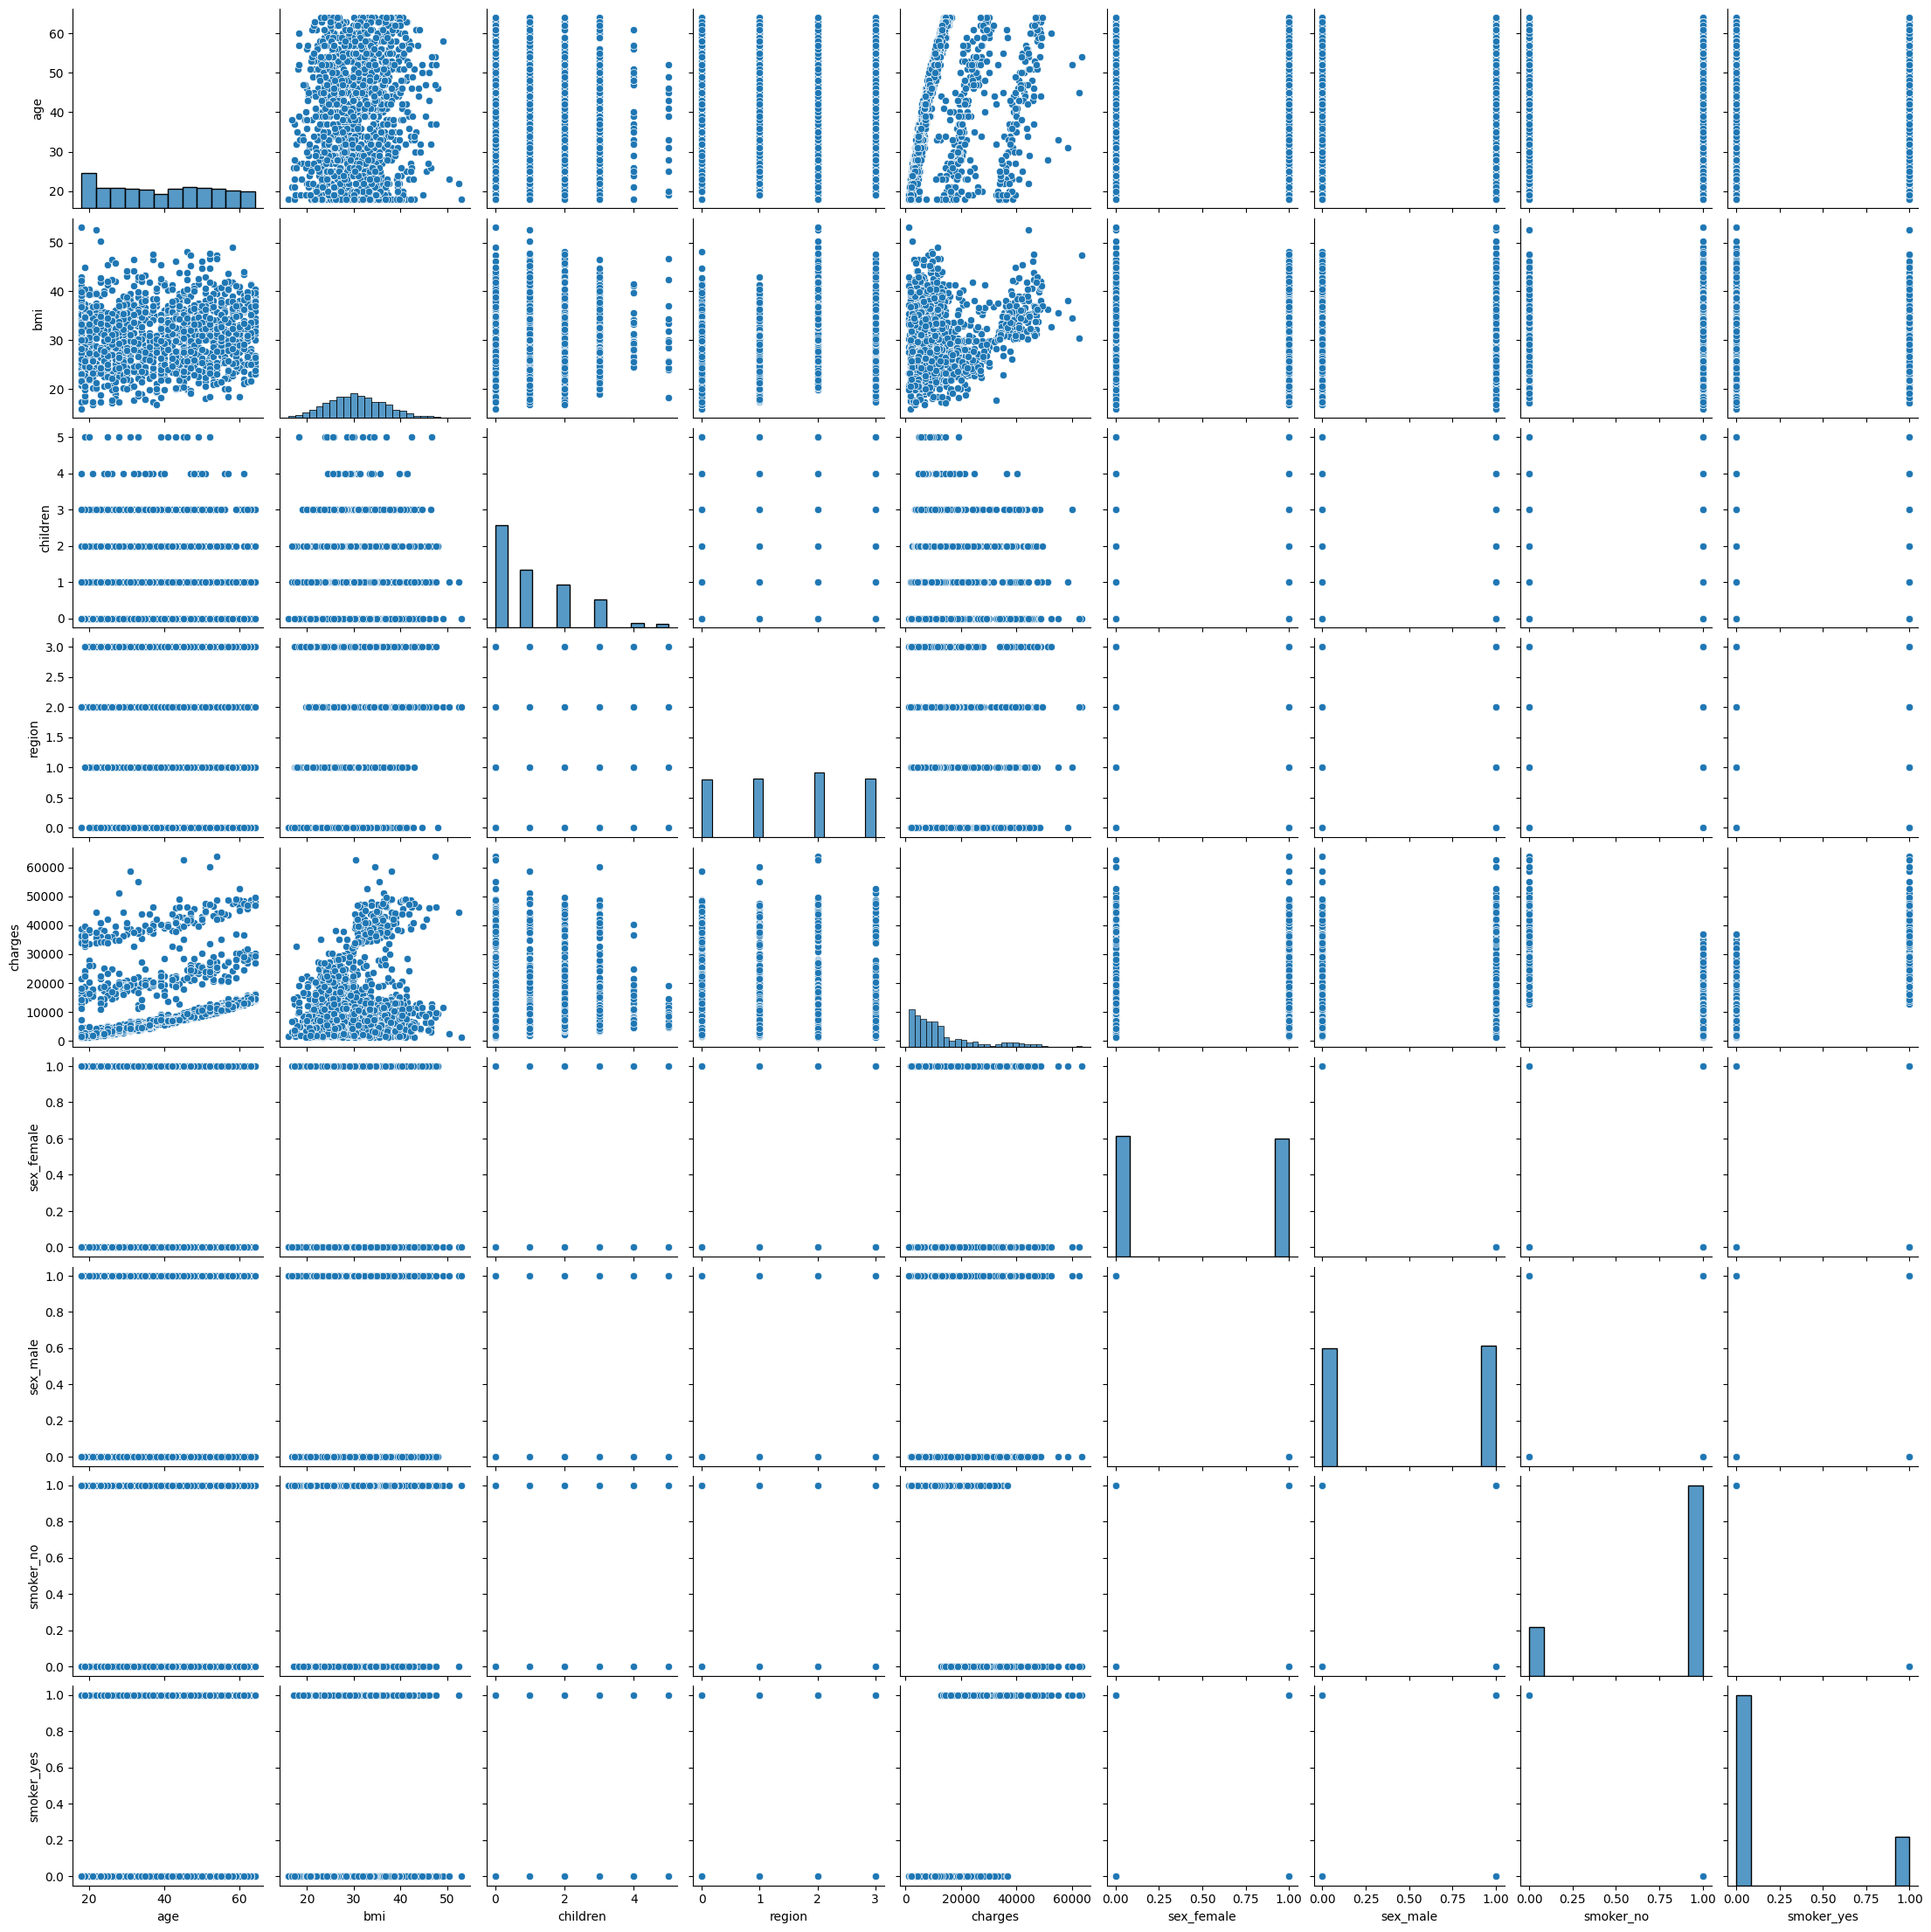

In [9]:
# Create the pairplot
sns.pairplot(df)

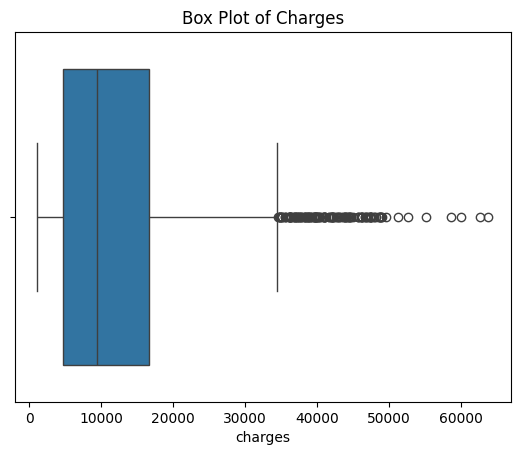

In [10]:
# Assuming 'df' is your dataframe and 'column_name' is the column you want to create a box plot for
sns.boxplot(x='charges', data=df)
plt.title('Box Plot of Charges')
plt.xlabel('charges')
plt.show()

In [11]:
# Check if all values in the DataFrame are numbers
all_numeric = pd.to_numeric(df.stack(), errors='coerce').notnull().all()

if all_numeric:
    print("All values in the DataFrame are numbers.")
else:
    print("Some values in the DataFrame are not numbers.")

    # Convert each column to numeric format
    numeric_df = df.apply(pd.to_numeric, errors='coerce')

    # Find rows with non-numeric values
    non_numeric_rows = df[numeric_df.isna().any(axis=1)]

    print("Rows with non-numeric values:")
    print(non_numeric_rows)

All values in the DataFrame are numbers.


In [12]:
#pull only the target
y = df['charges'].values

#drop the target
df.drop('charges', axis=1, inplace=True)

In [13]:
#pull all columns
X = df.values

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 5: Split the Data
Split your data as follows:
80% training set
10% validation set
10% test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5)

# Step 6: Train Regressor
Use decision trees, random forests and support vector regressions (SVRs) to fit your data.
Get r2 scores, mean square error (MSE) scores and mean absolute error (MAE) scores. You need a minimum r2 score of 82%
Compare the results of different models.
Hint: You need to choose the optimal value for the criteria for both decision trees and random forests using cross-validation.

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Initialize regressors
classifiers = {
    'DTR': DecisionTreeRegressor(criterion="friedman_mse", max_depth=2),
    'RFR': RandomForestRegressor(random_state=0, criterion="friedman_mse", n_estimators=7),
    'SVR': SVR(kernel='linear', gamma='auto', C=0.75, epsilon=0.4)
}

# Train classifiers and evaluate performance
for name, clf in classifiers.items():
    if name == 'DTR':
        clf.fit(X_train, y_train)
    elif name == 'RFR':
        clf.fit(X_train, y_train)
    elif name == 'SVR':
        clf.fit(X_train, y_train)
    else:
        exit
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    r_squared = r2_score(y_test, y_pred)

    print(f'Model: {name}, Score: {score:.2f}, R2Score: {r_squared:.2f}')

# Compare results and select the best classifier

Model: DTR, Score: 0.85, R2Score: 0.85
Model: RFR, Score: 0.85, R2Score: 0.85
Model: SVR, Score: 0.02, R2Score: 0.02
